# **Requesting Apple data from API (2010-2018)**

In [ ]:
import requests
import pandas as pd
import json

api_key = 'IJTCTE92X6KPDYVD'

url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=AAPL&outputsize=full&apikey={api_key}&datatype=json'

response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    time_series = data['Time Series (Daily)']
    stock_data = []

    for date, stock_info in time_series.items():
        # Filter stock data from 2010 to 2018
        if '2010-01-01' <= date <= '2018-12-31':
            stock_data.append([date,
                               stock_info['1. open'],
                               stock_info['2. high'],
                               stock_info['3. low'],
                               stock_info['4. close'],
                               stock_info['6. volume'],
                               stock_info['5. adjusted close']])
else:
    print("Request failed")

# Create DataFrame from the stock data
stock_data_df = pd.DataFrame(stock_data, columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adjusted Close'])

# Save DataFrame to a CSV file
stock_data_df.to_csv('AAPL_2010-2018.csv', index=False)

# Print the DataFrame
print(stock_data_df)

            Date    Open    High     Low   Close    Volume    Adjusted Close
0     2018-12-31  158.53  159.36  156.48  157.74  35003466  38.0016213946026
1     2018-12-28   157.5  158.52  154.55  156.23  42291424  37.6378427188967
2     2018-12-27  155.84  156.77  150.07  156.15  53117065  37.6185696764752
3     2018-12-26   148.3  157.23  146.72  157.17  58582544  37.8643009673494
4     2018-12-24  148.15  151.55  146.59  146.83  37169232  35.3732602343698
...          ...     ...     ...     ...     ...       ...               ...
2259  2010-01-08   210.3   212.0  209.06  211.98  15986100  6.44281099618905
2260  2010-01-07  211.75   212.0  209.05  210.58  17040400  6.40026011688598
2261  2010-01-06  214.38  215.23  210.75  210.97  19720000  6.41211357612041
2262  2010-01-05   214.6  215.59  213.25  214.38  21496600   6.5157553607086
2263  2010-01-04  213.43   214.5  212.38  214.01  17633200   6.5045097711785

[2264 rows x 7 columns]


In [ ]:
import requests
import pandas as pd
import json

api_key = 'IJTCTE92X6KPDYVD'

url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=AAPL&outputsize=full&apikey={api_key}&datatype=json'

response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    time_series = data['Time Series (Daily)']
    stock_data = []

    for date, stock_info in time_series.items():
        # Filter stock data from 2010 to 2018
        if date >= '2018-12-31':
            stock_data.append([date,
                               stock_info['1. open'],
                               stock_info['2. high'],
                               stock_info['3. low'],
                               stock_info['4. close'],
                               stock_info['6. volume'],
                               stock_info['5. adjusted close']])
else:
    print("Request failed")

# Create DataFrame from the stock data
stock_data_df_19toPre = pd.DataFrame(stock_data, columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adjusted Close'])

# Save DataFrame to a CSV file
stock_data_df_19toPre.to_csv('AAPL_19andForword.csv', index=False)

# Print the DataFrame
print(stock_data_df_19toPre)

            Date    Open    High       Low   Close    Volume    Adjusted Close
0     2023-05-03   169.5  170.92    167.16  167.45  59438769            167.45
1     2023-05-02  170.09  170.35    167.54  168.54  48425696            168.54
2     2023-05-01  169.28  170.45    168.64  169.59  52472936            169.59
3     2023-04-28  168.49  169.85  167.8801  169.68  55275851            169.68
4     2023-04-27  165.19  168.56    165.19  168.41  64902329            168.41
...          ...     ...     ...       ...     ...       ...               ...
1088  2019-01-07   148.7  148.83     145.9  147.93  54777764  35.6382645676655
1089  2019-01-04  144.53  148.55     143.8  148.26  58607070  35.7177658676542
1090  2019-01-03  143.98  145.72     142.0  142.19  91312195  34.2554237739226
1091  2019-01-02  154.89  158.85    154.23  157.92  37039737   38.044985740051
1092  2018-12-31  158.53  159.36    156.48  157.74  35003466  38.0016213946026

[1093 rows x 7 columns]


In [ ]:
stock_data_df_19toPre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            1093 non-null   object
 1   Open            1093 non-null   object
 2   High            1093 non-null   object
 3   Low             1093 non-null   object
 4   Close           1093 non-null   object
 5   Volume          1093 non-null   object
 6   Adjusted Close  1093 non-null   object
dtypes: object(7)
memory usage: 59.9+ KB


# **Exploratory Data Analysis**

**Background:** Starting from 06/09/2014, Apple decided to split on a 7-for-1 basis, we would try to multiple the stock after the split date by 7 in order to have a good sense while doing time analysis.

In [ ]:
#rotate the time horizon. 
stock_data_df = stock_data_df.iloc[::-1].reset_index(drop=True)

In [ ]:
# Set Date as datetime type and all the others to float type for better manipulation

stock_data_df['Date'] = pd.to_datetime(stock_data_df['Date'])

cols_to_convert = ['Open', 'High', 'Low', 'Close', 'Volume', 'Adjusted Close']
for col in cols_to_convert:
    stock_data_df[col] = stock_data_df[col].astype(float)

stock_data_df.head()

,Date,Open,High,Low,Close,Volume,Adjusted Close
0,2010-01-04,213.43,214.50,212.38,214.01,17633200.0,6.504510
1,2010-01-05,214.60,215.59,213.25,214.38,21496600.0,6.515755
2,2010-01-06,214.38,215.23,210.75,210.97,19720000.0,6.412114
3,2010-01-07,211.75,212.00,209.05,210.58,17040400.0,6.400260
4,2010-01-08,210.30,212.00,209.06,211.98,15986100.0,6.442811


In [ ]:
stock_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            2264 non-null   datetime64[ns]
 1   Open            2264 non-null   float64       
 2   High            2264 non-null   float64       
 3   Low             2264 non-null   float64       
 4   Close           2264 non-null   float64       
 5   Volume          2264 non-null   float64       
 6   Adjusted Close  2264 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 123.9 KB


In [ ]:
# Set the datetime column as the index
stock_data_df.set_index('Date', inplace=True)

# Multiply the value of the rows with datetime greater than '2014-06-08' by 7
stock_data_df.loc[stock_data_df.index > '2014-06-08', ['Open', 'High', 'Low', 'Close', 'Volume', 'Adjusted Close']] *= 7

stock_data_df.head()

,Open,High,Low,Close,Volume,Adjusted Close
Date,,,,,,
2010-01-04,213.43,214.50,212.38,214.01,17633200.0,6.504510
2010-01-05,214.60,215.59,213.25,214.38,21496600.0,6.515755
2010-01-06,214.38,215.23,210.75,210.97,19720000.0,6.412114
2010-01-07,211.75,212.00,209.05,210.58,17040400.0,6.400260
2010-01-08,210.30,212.00,209.06,211.98,15986100.0,6.442811


In [ ]:
stock_data_df.describe()

,Open,High,Low,Close,Volume,Adjusted Close
count,2264.000000,2264.000000,2264.000000,2264.000000,2.264000e+03,2264.000000
mean,696.214055,702.316021,689.700934,696.128480,1.490692e+08,119.394502
std,327.383693,330.136367,324.723359,327.440994,1.627525e+08,113.640985
min,192.370000,196.000000,190.250000,192.050000,5.624800e+06,5.837069
25%,431.530000,435.385000,427.305000,430.430000,1.549208e+07,13.314960
50%,662.480000,668.925000,655.480000,661.640000,1.101579e+08,146.207150
75%,881.807500,888.265000,874.212500,881.116250,2.450492e+08,199.304482
max,1615.460000,1634.290000,1608.460000,1624.490000,1.326924e+09,389.995292


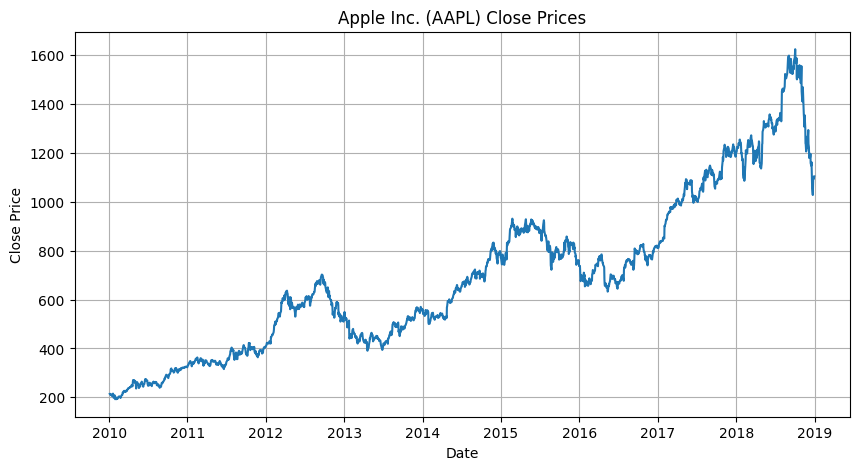

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(stock_data_df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Apple Inc. (AAPL) Close Prices')
plt.grid()
plt.show()

In [ ]:
pip install pandas_ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Adding more features:**

In [ ]:
'''import yfinance as yf
import pandas_ta as pta

df = stock_data_df.copy()

# Calculate RSI
df['RSI'] = pta.rsi(df['Close'], length=14)

# Calculate MACD
macd = pta.macd(df['Close'], fast=12, slow=26, signal=9)
df['MACD'] = macd.iloc[:, 0]
df['MACD Signal'] = macd.iloc[:, 1]
df['MACD Hist'] = macd.iloc[:, 2]

# Calculate Stochastic Oscillator
stoch = pta.stoch(df['High'], df['Low'], df['Close'])
df['%K'] = stoch.iloc[:, 0]
df['%D'] = stoch.iloc[:, 1]

# Calculate Rate of Change
df['ROC'] = pta.roc(df['Close'], length=10)

# Calculate On Balance Volume
df['OBV'] = pta.obv(df['Close'], df['Volume'])

# Calculate Williams %R
df['Williams %R'] = pta.willr(df['High'], df['Low'], df['Close'], length=14)

# Save the results to a new CSV file
df.to_csv('AAPL_stock_and_indicators_2010_to_2018.csv')'''

"import yfinance as yf\nimport pandas_ta as pta\n\ndf = stock_data_df.copy()\n\n# Calculate RSI\ndf['RSI'] = pta.rsi(df['Close'], length=14)\n\n# Calculate MACD\nmacd = pta.macd(df['Close'], fast=12, slow=26, signal=9)\ndf['MACD'] = macd.iloc[:, 0]\ndf['MACD Signal'] = macd.iloc[:, 1]\ndf['MACD Hist'] = macd.iloc[:, 2]\n\n# Calculate Stochastic Oscillator\nstoch = pta.stoch(df['High'], df['Low'], df['Close'])\ndf['%K'] = stoch.iloc[:, 0]\ndf['%D'] = stoch.iloc[:, 1]\n\n# Calculate Rate of Change\ndf['ROC'] = pta.roc(df['Close'], length=10)\n\n# Calculate On Balance Volume\ndf['OBV'] = pta.obv(df['Close'], df['Volume'])\n\n# Calculate Williams %R\ndf['Williams %R'] = pta.willr(df['High'], df['Low'], df['Close'], length=14)\n\n# Save the results to a new CSV file\ndf.to_csv('AAPL_stock_and_indicators_2010_to_2018.csv')"

In [ ]:
'''df = pd.read_csv('/content/AAPL_stock_and_indicators_2010_to_2018.csv')
df.head()'''

"df = pd.read_csv('/content/AAPL_stock_and_indicators_2010_to_2018.csv')\ndf.head()"

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf

# Getting CBOE Volatility Index from 2010 to 2018

vix_symbol = '^VIX'

vix_data = yf.download(vix_symbol, start='2010-01-01', end='2018-12-31')

vix_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,21.680000,21.680000,20.030001,20.040001,20.040001,0
2010-01-05,20.049999,20.129999,19.340000,19.350000,19.350000,0
2010-01-06,19.590000,19.680000,18.770000,19.160000,19.160000,0
2010-01-07,19.680000,19.709999,18.700001,19.059999,19.059999,0
2010-01-08,19.270000,19.270000,18.110001,18.129999,18.129999,0
...,...,...,...,...,...,...
2018-12-21,28.240000,31.350000,25.709999,30.110001,30.110001,0
2018-12-24,29.290001,36.099998,29.160000,36.070000,36.070000,0
2018-12-26,35.500000,36.200001,29.590000,30.410000,30.410000,0


In [ ]:
vix_data = vix_data.add_prefix("vix_")
vix_data.reset_index(inplace=True)
vix_data['Date'] = pd.to_datetime(vix_data['Date'])
vix_data.head()

,Date,vix_Open,vix_High,vix_Low,vix_Close,vix_Adj Close,vix_Volume
0,2010-01-04,21.680000,21.680000,20.030001,20.040001,20.040001,0
1,2010-01-05,20.049999,20.129999,19.340000,19.350000,19.350000,0
2,2010-01-06,19.590000,19.680000,18.770000,19.160000,19.160000,0
3,2010-01-07,19.680000,19.709999,18.700001,19.059999,19.059999,0
4,2010-01-08,19.270000,19.270000,18.110001,18.129999,18.129999,0


**Import NASDAQ Composite data**

Apple's stock price is related to the Nasdaq Composite index. The Nasdaq Composite is a stock market index that includes the common stocks and similar securities listed on the Nasdaq stock market, which is a major stock exchange in the United States. As Apple is a publicly traded company listed on the Nasdaq stock market, its stock price is a component of the Nasdaq Composite. 

In [ ]:
#import the NASDAQ Composite data
import yfinance as yf

# Set the ticker symbol for NASDAQ Composite
tickerSymbol = '^IXIC'

# Set the start and end dates
start_date = '2010-01-01'
end_date = '2018-12-31'

# Get the data
nasdaq_data = yf.download(tickerSymbol, start=start_date, end=end_date)
nasdaq_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,2294.409912,2311.149902,2294.409912,2308.419922,2308.419922,1931380000
2010-01-05,2307.270020,2313.729980,2295.620117,2308.709961,2308.709961,2367860000
2010-01-06,2307.709961,2314.070068,2295.679932,2301.090088,2301.090088,2253340000
2010-01-07,2298.090088,2301.300049,2285.219971,2300.050049,2300.050049,2270050000
2010-01-08,2292.239990,2317.600098,2290.610107,2317.169922,2317.169922,2145390000
...,...,...,...,...,...,...
2018-12-21,6573.490234,6586.680176,6304.629883,6332.990234,6332.990234,4571670000
2018-12-24,6278.490234,6355.180176,6190.169922,6192.919922,6192.919922,1647440000
2018-12-26,6257.859863,6555.529785,6214.339844,6554.359863,6554.359863,2572890000


In [ ]:
nasdaq_data = nasdaq_data.add_prefix("nasdaq_")
nasdaq_data.reset_index(inplace=True)
nasdaq_data['Date'] = pd.to_datetime(nasdaq_data['Date'])
nasdaq_data.head()

,Date,nasdaq_Open,nasdaq_High,nasdaq_Low,nasdaq_Close,nasdaq_Adj Close,nasdaq_Volume
0,2010-01-04,2294.409912,2311.149902,2294.409912,2308.419922,2308.419922,1931380000
1,2010-01-05,2307.270020,2313.729980,2295.620117,2308.709961,2308.709961,2367860000
2,2010-01-06,2307.709961,2314.070068,2295.679932,2301.090088,2301.090088,2253340000
3,2010-01-07,2298.090088,2301.300049,2285.219971,2300.050049,2300.050049,2270050000
4,2010-01-08,2292.239990,2317.600098,2290.610107,2317.169922,2317.169922,2145390000


In [ ]:
df = pd.merge(stock_data_df, vix_data,on = 'Date', how='left')
df.tail()

,Date,Open,High,Low,Close,Volume,Adjusted Close,vix_Open,vix_High,vix_Low,vix_Close,vix_Adj Close,vix_Volume
2259,2018-12-24,1037.05,1060.85,1026.13,1027.81,260184624.0,247.612822,29.290001,36.099998,29.16,36.070000,36.070000,0.0
2260,2018-12-26,1038.10,1100.61,1027.04,1100.19,410077808.0,265.050107,35.500000,36.200001,29.59,30.410000,30.410000,0.0
2261,2018-12-27,1090.88,1097.39,1050.49,1093.05,371819455.0,263.329988,31.200001,33.799999,29.66,29.959999,29.959999,0.0
2262,2018-12-28,1102.50,1109.64,1081.85,1093.61,296039968.0,263.464899,29.969999,31.049999,27.43,28.340000,28.340000,0.0
2263,2018-12-31,1109.71,1115.52,1095.36,1104.18,245024262.0,266.011350,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = pd.merge(df, nasdaq_data,on = 'Date', how='left')
df.tail()

,Date,Open,High,Low,Close,Volume,Adjusted Close,vix_Open,vix_High,vix_Low,vix_Close,vix_Adj Close,vix_Volume,nasdaq_Open,nasdaq_High,nasdaq_Low,nasdaq_Close,nasdaq_Adj Close,nasdaq_Volume
2259,2018-12-24,1037.05,1060.85,1026.13,1027.81,260184624.0,247.612822,29.290001,36.099998,29.16,36.070000,36.070000,0.0,6278.490234,6355.180176,6190.169922,6192.919922,6192.919922,1.647440e+09
2260,2018-12-26,1038.10,1100.61,1027.04,1100.19,410077808.0,265.050107,35.500000,36.200001,29.59,30.410000,30.410000,0.0,6257.859863,6555.529785,6214.339844,6554.359863,6554.359863,2.572890e+09
2261,2018-12-27,1090.88,1097.39,1050.49,1093.05,371819455.0,263.329988,31.200001,33.799999,29.66,29.959999,29.959999,0.0,6457.189941,6583.009766,6336.970215,6579.490234,6579.490234,2.449110e+09
2262,2018-12-28,1102.50,1109.64,1081.85,1093.61,296039968.0,263.464899,29.969999,31.049999,27.43,28.340000,28.340000,0.0,6616.790039,6684.180176,6529.220215,6584.520020,6584.520020,2.216250e+09
2263,2018-12-31,1109.71,1115.52,1095.36,1104.18,245024262.0,266.011350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# shift the 'Close' price forward by 7 rows
df['Price_7_days'] = df['Close'].shift(-7)

# calculate the price change after 7 days
df['Close_Price_Change'] = df['Price_7_days'] - df['Close']

# create a new column indicating whether the price increased or decreased after 7 days
# Increased: 1, Decreased: 0
df['Price_7_days_Status'] = 1 
df.loc[df['Close_Price_Change'] < 0, 'Price_7_days_Status'] = 0

df

,Date,Open,High,Low,Close,Volume,Adjusted Close,vix_Open,vix_High,vix_Low,...,vix_Volume,nasdaq_Open,nasdaq_High,nasdaq_Low,nasdaq_Close,nasdaq_Adj Close,nasdaq_Volume,Price_7_days,Close_Price_Change,Price_7_days_Status
0,2010-01-04,213.43,214.50,212.38,214.01,17633200.0,6.504510,21.680000,21.680000,20.030001,...,0.0,2294.409912,2311.149902,2294.409912,2308.419922,2308.419922,1.931380e+09,210.650,-3.360,0
1,2010-01-05,214.60,215.59,213.25,214.38,21496600.0,6.515755,20.049999,20.129999,19.340000,...,0.0,2307.270020,2313.729980,2295.620117,2308.709961,2308.709961,2.367860e+09,209.430,-4.950,0
2,2010-01-06,214.38,215.23,210.75,210.97,19720000.0,6.412114,19.590000,19.680000,18.770000,...,0.0,2307.709961,2314.070068,2295.679932,2301.090088,2301.090088,2.253340e+09,205.930,-5.040,0
3,2010-01-07,211.75,212.00,209.05,210.58,17040400.0,6.400260,19.680000,19.709999,18.700001,...,0.0,2298.090088,2301.300049,2285.219971,2300.050049,2300.050049,2.270050e+09,215.040,4.460,1
4,2010-01-08,210.30,212.00,209.06,211.98,15986100.0,6.442811,19.270000,19.270000,18.110001,...,0.0,2292.239990,2317.600098,2290.610107,2317.169922,2317.169922,2.145390e+09,211.725,-0.255,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259,2018-12-24,1037.05,1060.85,1026.13,1027.81,260184624.0,247.612822,29.290001,36.099998,29.160000,...,0.0,6278.490234,6355.180176,6190.169922,6192.919922,6192.919922,1.647440e+09,NaN,NaN,1
2260,2018-12-26,1038.10,1100.61,1027.04,1100.19,410077808.0,265.050107,35.500000,36.200001,29.590000,...,0.0,6257.859863,6555.529785,6214.339844,6554.359863,6554.359863,2.572890e+09,NaN,NaN,1
2261,2018-12-27,1090.88,1097.39,1050.49,1093.05,371819455.0,263.329988,31.200001,33.799999,29.660000,...,0.0,6457.189941,6583.009766,6336.970215,6579.490234,6579.490234,2.449110e+09,NaN,NaN,1
2262,2018-12-28,1102.50,1109.64,1081.85,1093.61,296039968.0,263.464899,29.969999,31.049999,27.430000,...,0.0,6616.790039,6684.180176,6529.220215,6584.520020,6584.520020,2.216250e+09,NaN,NaN,1


In [ ]:
'''# Shift the 'Close' price forward by 30 and 60 rows
df['Price_30_days'] = df['Close'].shift(-30)
df['Price_60_days'] = df['Close'].shift(-60)

# Calculate the price change after 30 and 60 days
df['Close_Price_Change_30'] = df['Price_30_days'] - df['Close']
df['Close_Price_Change_60'] = df['Price_60_days'] - df['Close']

# Create new columns indicating whether the price increased or decreased after 30 and 60 days
# Increased: 1, Decreased: 0
df['Price_30_days_Status'] = 1
df['Price_60_days_Status'] = 1

df.loc[df['Close_Price_Change_30'] < 0, 'Price_30_days_Status'] = 0
df.loc[df['Close_Price_Change_60'] < 0, 'Price_60_days_Status'] = 0

# Drop the unnecessary columns
df = df.drop(columns=['Price_30_days', 'Price_60_days', 'Close_Price_Change_30', 'Close_Price_Change_60'])

df'''


"# Shift the 'Close' price forward by 30 and 60 rows\ndf['Price_30_days'] = df['Close'].shift(-30)\ndf['Price_60_days'] = df['Close'].shift(-60)\n\n# Calculate the price change after 30 and 60 days\ndf['Close_Price_Change_30'] = df['Price_30_days'] - df['Close']\ndf['Close_Price_Change_60'] = df['Price_60_days'] - df['Close']\n\n# Create new columns indicating whether the price increased or decreased after 30 and 60 days\n# Increased: 1, Decreased: 0\ndf['Price_30_days_Status'] = 1\ndf['Price_60_days_Status'] = 1\n\ndf.loc[df['Close_Price_Change_30'] < 0, 'Price_30_days_Status'] = 0\ndf.loc[df['Close_Price_Change_60'] < 0, 'Price_60_days_Status'] = 0\n\n# Drop the unnecessary columns\ndf = df.drop(columns=['Price_30_days', 'Price_60_days', 'Close_Price_Change_30', 'Close_Price_Change_60'])\n\ndf"

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adjusted Close',
       'vix_Open', 'vix_High', 'vix_Low', 'vix_Close', 'vix_Adj Close',
       'vix_Volume', 'nasdaq_Open', 'nasdaq_High', 'nasdaq_Low',
       'nasdaq_Close', 'nasdaq_Adj Close', 'nasdaq_Volume', 'Price_7_days',
       'Close_Price_Change', 'Price_7_days_Status'],
      dtype='object')

In [ ]:
# data Smoothing process


In [ ]:
# define the number of days out you want to predict
days_out = 60

cp_df=df.copy()

# Group by symbol, then apply the rolling function and grab the Min and Max.
sm_df = cp_df[['Open', 'High', 'Low', 'Close', 'Volume', 'Adjusted Close',
       'vix_Open', 'vix_High', 'vix_Low', 'vix_Close', 'vix_Adj Close',
       'vix_Volume', 'nasdaq_Open', 'nasdaq_High', 'nasdaq_Low',
       'nasdaq_Close', 'nasdaq_Adj Close', 'nasdaq_Volume', 'Price_7_days',
       'Close_Price_Change']].transform(lambda x: x.ewm(span = days_out).mean())

cp_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adjusted Close',
       'vix_Open', 'vix_High', 'vix_Low', 'vix_Close', 'vix_Adj Close',
       'vix_Volume', 'nasdaq_Open', 'nasdaq_High', 'nasdaq_Low',
       'nasdaq_Close', 'nasdaq_Adj Close', 'nasdaq_Volume', 'Price_7_days',
       'Close_Price_Change', 'Price_7_days_Status'],
      dtype='object')

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adjusted Close',
       'vix_Open', 'vix_High', 'vix_Low', 'vix_Close', 'vix_Adj Close',
       'vix_Volume', 'nasdaq_Open', 'nasdaq_High', 'nasdaq_Low',
       'nasdaq_Close', 'nasdaq_Adj Close', 'nasdaq_Volume', 'Price_7_days',
       'Close_Price_Change', 'Price_7_days_Status'],
      dtype='object')

In [ ]:
# Join the smoothed columns with the symbol and datetime column from the old data frame.
sm_df = pd.concat([df[['Date']], sm_df], axis=1, sort=False)

# define the number of days out you want to predict
days_out = 60

# create a new column that will house the flag, and for each group calculate the diff compared to days_out days ago. Then use Numpy to define the sign.
# sm_df['Signal_Flag'] = df['Close'].transform(lambda x: np.sign(x.diff(days_out)))

# print the first 50 rows
sm_df.head(5)

,Date,Open,High,Low,Close,Volume,Adjusted Close,vix_Open,vix_High,vix_Low,...,vix_Adj Close,vix_Volume,nasdaq_Open,nasdaq_High,nasdaq_Low,nasdaq_Close,nasdaq_Adj Close,nasdaq_Volume,Price_7_days,Close_Price_Change
0,2010-01-04,213.430000,214.500000,212.380000,214.010000,1.763320e+07,6.504510,21.680000,21.680000,20.030001,...,20.040001,0.0,2294.409912,2311.149902,2294.409912,2308.419922,2308.419922,1.931380e+09,210.650000,-3.360000
1,2010-01-05,214.024750,215.054083,212.822250,214.198083,1.959710e+07,6.510226,20.851416,20.892083,19.679250,...,19.689251,0.0,2300.947133,2312.461442,2295.025100,2308.567358,2308.567358,2.153257e+09,210.029833,-4.168250
2,2010-01-06,214.147135,215.114688,212.108349,213.085992,1.963944e+07,6.476426,20.416852,20.474514,19.366009,...,19.506921,0.0,2303.276962,2313.015622,2295.250693,2305.991400,2305.991400,2.187736e+09,208.617420,-4.468572
3,2010-01-07,213.517560,214.296657,211.305115,212.427827,1.895683e+07,6.456422,20.223328,20.273725,19.191091,...,19.389543,0.0,2301.914700,2309.938685,2292.616259,2304.430984,2304.430984,2.209355e+09,210.304224,-2.123603
4,2010-01-08,212.830445,213.806202,210.825667,212.332193,1.832243e+07,6.453515,20.019743,20.059378,18.960222,...,19.120565,0.0,2299.848648,2311.574793,2292.187842,2307.151407,2307.151407,2.195695e+09,210.607633,-1.724560


**We adopted the following metrics from Khaidem,2016 paper as our features:**

*RSI*: RSI is a popular momentum indicator which determines whether the stock is overbought or oversold.

*Stochastic Oscillator*: Stochastic Oscillator follows the speed or the momentum of the price. 

*Williams %R*: Williams %R ranges from -100 to 0. When its value is above -20, it indicates a sell signal and when its value is below -80, it indicates a buy signal.

*Moving Average Convergence Divergence (MACD)*: 

MACD = EMA12(C) −EMA26(C)
SignalLine = EMA9(MACD)

stands for Exponential Moving Average. When the MACD goes below the SingalLine, it indicates a sell signal. When it goes above the SignalLine, it indicates a buy signal.

*On Balance Volumn*: This technical indicator is used to find buying and selling trends of a stock.

*Price Rate of Change*: It measures the most recent change in price with respect to the price in n days ago.

In [ ]:
# Calculate indicators
import yfinance as yf
import pandas_ta as pta

df = sm_df.copy()

# Calculate RSI
df['RSI'] = pta.rsi(df['Close'], length=14)

# Calculate MACD
macd = pta.macd(df['Close'], fast=12, slow=26, signal=9)
df['MACD'] = macd.iloc[:, 0]
df['MACD Signal'] = macd.iloc[:, 1]
df['MACD Hist'] = macd.iloc[:, 2]

# Calculate Stochastic Oscillator
stoch = pta.stoch(df['High'], df['Low'], df['Close'])
df['%K'] = stoch.iloc[:, 0]
df['%D'] = stoch.iloc[:, 1]

# Calculate Rate of Change
df['ROC'] = pta.roc(df['Close'], length=10)

# Calculate On Balance Volume
df['OBV'] = pta.obv(df['Close'], df['Volume'])

# Calculate Williams %R
df['Williams %R'] = pta.willr(df['High'], df['Low'], df['Close'], length=14)


df

,Date,Open,High,Low,Close,Volume,Adjusted Close,vix_Open,vix_High,vix_Low,...,Close_Price_Change,RSI,MACD,MACD Signal,MACD Hist,%K,%D,ROC,OBV,Williams %R
0,2010-01-04,213.430000,214.500000,212.380000,214.010000,1.763320e+07,6.504510,21.680000,21.680000,20.030001,...,-3.360000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.763320e+07,NaN
1,2010-01-05,214.024750,215.054083,212.822250,214.198083,1.959710e+07,6.510226,20.851416,20.892083,19.679250,...,-4.168250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.723030e+07,NaN
2,2010-01-06,214.147135,215.114688,212.108349,213.085992,1.963944e+07,6.476426,20.416852,20.474514,19.366009,...,-4.468572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.759086e+07,NaN
3,2010-01-07,213.517560,214.296657,211.305115,212.427827,1.895683e+07,6.456422,20.223328,20.273725,19.191091,...,-2.123603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.365976e+06,NaN
4,2010-01-08,212.830445,213.806202,210.825667,212.332193,1.832243e+07,6.453515,20.019743,20.059378,18.960222,...,-1.724560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.968840e+07,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259,2018-12-24,1319.681890,1334.431395,1298.059795,1313.105450,2.981940e+08,315.838560,20.214576,22.072003,19.146029,...,-53.554703,1.720027,-36.575173,-4.533414,-32.041759,12.662117,13.220852,-5.261152,1.048489e+11,-88.086531
2260,2018-12-26,1310.449697,1326.765120,1289.173900,1306.124615,3.018623e+08,314.173365,20.715737,22.535216,19.488454,...,-53.554703,1.585591,-37.691808,-4.520039,-33.171768,12.597081,12.844424,-5.304217,1.045470e+11,-86.818060
2261,2018-12-27,1303.250690,1319.244624,1281.348198,1299.138562,3.041560e+08,312.506369,21.059483,22.904553,19.821947,...,-53.554703,1.462406,-38.694420,-4.418121,-34.276299,12.927507,12.728901,-5.370762,1.042428e+11,-86.312889
2262,2018-12-28,1296.668700,1312.372342,1274.807274,1292.399921,3.038899e+08,310.898452,21.351631,23.171617,20.071392,...,-53.554703,1.353198,-39.576536,-4.240190,-35.336346,13.492271,13.005620,-5.463746,1.039390e+11,-86.392237


In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adjusted Close',
       'vix_Open', 'vix_High', 'vix_Low', 'vix_Close', 'vix_Adj Close',
       'vix_Volume', 'nasdaq_Open', 'nasdaq_High', 'nasdaq_Low',
       'nasdaq_Close', 'nasdaq_Adj Close', 'nasdaq_Volume', 'Price_7_days',
       'Close_Price_Change', 'RSI', 'MACD', 'MACD Signal', 'MACD Hist', '%K',
       '%D', 'ROC', 'OBV', 'Williams %R'],
      dtype='object')

In [ ]:
# Drop 'Price_7_days' and 'Close_Price_Change' columns if they exist
columns_to_drop = ['Price_7_days', 'Close_Price_Change']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adjusted Close',
       'vix_Open', 'vix_High', 'vix_Low', 'vix_Close', 'vix_Adj Close',
       'vix_Volume', 'nasdaq_Open', 'nasdaq_High', 'nasdaq_Low',
       'nasdaq_Close', 'nasdaq_Adj Close', 'nasdaq_Volume', 'RSI', 'MACD',
       'MACD Signal', 'MACD Hist', '%K', '%D', 'ROC', 'OBV', 'Williams %R'],
      dtype='object')

In [ ]:
'''# shift the 'Close' price forward by 7 rows
df['Price_7_days'] = df['Close'].shift(-7)

# calculate the price change after 7 days
df['Close_Price_Change'] = df['Price_7_days'] - df['Close']

# create a new column indicating whether the price increased or decreased after 7 days
# Increased: 1, Decreased: 0
df['Price_7_days_Status'] = 1 
df.loc[df['Close_Price_Change'] < 0, 'Price_7_days_Status'] = 0

df'''

"# shift the 'Close' price forward by 7 rows\ndf['Price_7_days'] = df['Close'].shift(-7)\n\n# calculate the price change after 7 days\ndf['Close_Price_Change'] = df['Price_7_days'] - df['Close']\n\n# create a new column indicating whether the price increased or decreased after 7 days\n# Increased: 1, Decreased: 0\ndf['Price_7_days_Status'] = 1 \ndf.loc[df['Close_Price_Change'] < 0, 'Price_7_days_Status'] = 0\n\ndf"

In [ ]:
'''# Shift the 'Close' price forward by 30 and 60 rows
df['Price_30_days'] = df['Close'].shift(-30)


# Calculate the price change after 30 and 60 days
df['Close_Price_Change_30'] = df['Price_30_days'] - df['Close']


# Create new columns indicating whether the price increased or decreased after 30 and 60 days
# Increased: 1, Decreased: 0
df['Price_30_days_Status'] = 1


df.loc[df['Close_Price_Change_30'] < 0, 'Price_30_days_Status'] = 0


# Drop the unnecessary columns
df = df.drop(columns=['Price_30_days', 'Close_Price_Change_30'])

df'''

"# Shift the 'Close' price forward by 30 and 60 rows\ndf['Price_30_days'] = df['Close'].shift(-30)\n\n\n# Calculate the price change after 30 and 60 days\ndf['Close_Price_Change_30'] = df['Price_30_days'] - df['Close']\n\n\n# Create new columns indicating whether the price increased or decreased after 30 and 60 days\n# Increased: 1, Decreased: 0\ndf['Price_30_days_Status'] = 1\n\n\ndf.loc[df['Close_Price_Change_30'] < 0, 'Price_30_days_Status'] = 0\n\n\n# Drop the unnecessary columns\ndf = df.drop(columns=['Price_30_days', 'Close_Price_Change_30'])\n\ndf"

In [ ]:
# Shift the 'Close' price forward by 30 and 60 rows

df['Price_60_days'] = df['Close'].shift(-60)

# Calculate the price change after 30 and 60 days

df['Close_Price_Change_60'] = df['Price_60_days'] - df['Close']

# Create new columns indicating whether the price increased or decreased after 30 and 60 days
# Increased: 1, Decreased: 0

df['Price_60_days_Status'] = 1


df.loc[df['Close_Price_Change_60'] < 0, 'Price_60_days_Status'] = 0

# Drop the unnecessary columns
df = df.drop(columns=['Price_60_days', 'Close_Price_Change_60'])

df

,Date,Open,High,Low,Close,Volume,Adjusted Close,vix_Open,vix_High,vix_Low,...,RSI,MACD,MACD Signal,MACD Hist,%K,%D,ROC,OBV,Williams %R,Price_60_days_Status
0,2010-01-04,213.430000,214.500000,212.380000,214.010000,1.763320e+07,6.504510,21.680000,21.680000,20.030001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.763320e+07,NaN,1
1,2010-01-05,214.024750,215.054083,212.822250,214.198083,1.959710e+07,6.510226,20.851416,20.892083,19.679250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.723030e+07,NaN,1
2,2010-01-06,214.147135,215.114688,212.108349,213.085992,1.963944e+07,6.476426,20.416852,20.474514,19.366009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.759086e+07,NaN,1
3,2010-01-07,213.517560,214.296657,211.305115,212.427827,1.895683e+07,6.456422,20.223328,20.273725,19.191091,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.365976e+06,NaN,1
4,2010-01-08,212.830445,213.806202,210.825667,212.332193,1.832243e+07,6.453515,20.019743,20.059378,18.960222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.968840e+07,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259,2018-12-24,1319.681890,1334.431395,1298.059795,1313.105450,2.981940e+08,315.838560,20.214576,22.072003,19.146029,...,1.720027,-36.575173,-4.533414,-32.041759,12.662117,13.220852,-5.261152,1.048489e+11,-88.086531,1
2260,2018-12-26,1310.449697,1326.765120,1289.173900,1306.124615,3.018623e+08,314.173365,20.715737,22.535216,19.488454,...,1.585591,-37.691808,-4.520039,-33.171768,12.597081,12.844424,-5.304217,1.045470e+11,-86.818060,1
2261,2018-12-27,1303.250690,1319.244624,1281.348198,1299.138562,3.041560e+08,312.506369,21.059483,22.904553,19.821947,...,1.462406,-38.694420,-4.418121,-34.276299,12.927507,12.728901,-5.370762,1.042428e+11,-86.312889,1
2262,2018-12-28,1296.668700,1312.372342,1274.807274,1292.399921,3.038899e+08,310.898452,21.351631,23.171617,20.071392,...,1.353198,-39.576536,-4.240190,-35.336346,13.492271,13.005620,-5.463746,1.039390e+11,-86.392237,1


In [ ]:
df = df.dropna()

df

,Date,Open,High,Low,Close,Volume,Adjusted Close,vix_Open,vix_High,vix_Low,...,RSI,MACD,MACD Signal,MACD Hist,%K,%D,ROC,OBV,Williams %R,Price_60_days_Status
33,2010-02-22,202.645843,204.651736,199.699169,202.069393,2.437057e+07,6.141593,22.441123,23.412303,21.398762,...,5.475305,-2.807528,0.376391,-3.183919,26.264933,24.561877,-0.805526,-5.099742e+08,-71.998405,1
34,2010-02-23,202.519870,204.493583,199.509238,201.830840,2.418814e+07,6.134343,22.343465,23.342204,21.335021,...,5.157806,-2.698690,0.388184,-3.086873,27.167217,25.978187,-0.651424,-5.341623e+08,-72.944631,1
35,2010-02-24,202.318606,204.350320,199.430923,201.775721,2.382504e+07,6.132667,22.291226,23.259528,21.282709,...,5.084442,-2.587061,0.399850,-2.986911,27.811966,27.081372,-0.485606,-5.579874e+08,-71.621066,1
36,2010-02-25,202.090133,204.281374,199.313374,201.786096,2.382178e+07,6.132983,22.279141,23.232717,21.226143,...,5.357342,-2.469292,0.414095,-2.883387,29.133094,28.037426,-0.272770,-5.341656e+08,-68.035021,1
37,2010-02-26,202.103365,204.321938,199.436011,201.915457,2.356167e+07,6.136914,22.169626,23.109345,21.139133,...,8.875122,-2.338563,0.435859,-2.774422,32.154542,29.699868,-0.110994,-5.106039e+08,-63.880287,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259,2018-12-24,1319.681890,1334.431395,1298.059795,1313.105450,2.981940e+08,315.838560,20.214576,22.072003,19.146029,...,1.720027,-36.575173,-4.533414,-32.041759,12.662117,13.220852,-5.261152,1.048489e+11,-88.086531,1
2260,2018-12-26,1310.449697,1326.765120,1289.173900,1306.124615,3.018623e+08,314.173365,20.715737,22.535216,19.488454,...,1.585591,-37.691808,-4.520039,-33.171768,12.597081,12.844424,-5.304217,1.045470e+11,-86.818060,1
2261,2018-12-27,1303.250690,1319.244624,1281.348198,1299.138562,3.041560e+08,312.506369,21.059483,22.904553,19.821947,...,1.462406,-38.694420,-4.418121,-34.276299,12.927507,12.728901,-5.370762,1.042428e+11,-86.312889,1
2262,2018-12-28,1296.668700,1312.372342,1274.807274,1292.399921,3.038899e+08,310.898452,21.351631,23.171617,20.071392,...,1.353198,-39.576536,-4.240190,-35.336346,13.492271,13.005620,-5.463746,1.039390e+11,-86.392237,1


In [ ]:
df.to_csv('dataset_60days.csv', index=False)

Reference: 

Khaidem, Luckyson & Saha, Snehanshu & Basak, Suryoday & Kar, Saibal & Dey, Sudeepa. (2016). Predicting the direction of stock market prices using random forest. 